# Capítulo 4 – A Transformada-z
Livro: *Digital Signal Processing Using MATLAB (3rd ed.)*

A Transforada-z surge com a necessidade de cobrir 2 problemas que a tranformada de discreta de Fourier não consegue lidar: Há muitos sinais sendo utilizados, para qual a transformada discreta de Fourier não existe, e, a transformada discreta de Fourier não é capaz de computar a resposta transitória, devido a condições iniciais ou mudaças de entradas.

## 4.1 A Transformada-z Bilateral

A Transformada-z bilateral é definida por:

$$
X(z) = \sum_{n=-\infty}^{\infty} x[n] z^{-n}
$$

O conjunto de valores de z, que é uma variável complexa, para que $X(z)$ exista é chama de Região de Convergência.

### 💡 Comentários sobre a Transformada-z

1. A variável complexa $z$ é chamada de **frequência complexa** e é dada por:

   $$
   z = |z| e^{j\omega}
   $$

   onde $|z|$ representa a **magnitude** e $\omega$ é a **frequência real**.

---

2. A **Região de Convergência (ROC)** da Transformada-z depende da magnitude $|z|$, e sua forma é geralmente um **anel aberto** no plano-z (como ilustrado na Figura 4.1 do livro).

   - O limite inferior $R_x^-$ pode ser igual a zero.
   - O limite superior $R_x^+$ pode tender ao infinito.
   - A ROC pode ter várias formas dependendo da causalidade e estabilidade do sinal.

---

3. Se $R_x^+ < R_x^-$, a região de convergência é **vazia** e, portanto, **a transformada-z não existe** para esse sinal.

---

4. A curva $|z| = 1$ (ou seja, $z = e^{j\omega}$) representa um **círculo de raio unitário** no plano-z, conhecido como **círculo unitário**.

   - Se a ROC **contém o círculo unitário**, podemos avaliar $X(z)$ nesse contorno:

   $$X(z) \bigg|_{z = e^{j\omega}} = X(e^{j\omega}) = \sum_{n = -\infty}^{\infty} x[n] e^{-j\omega n} = \mathcal{F}\{x[n]\}$$


   - Portanto, a **Transformada de Fourier** para sinais em tempo discreto, $X(e^{j\omega})$, é um **caso particular da Transformada-z** avaliada sobre o círculo unitário.


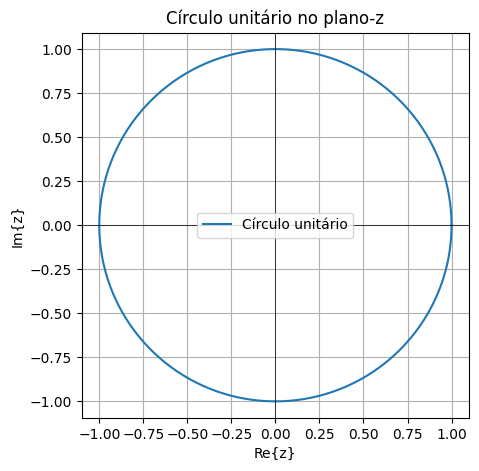

In [3]:
theta = np.linspace(0, 2*np.pi, 300)
x = np.cos(theta)
y = np.sin(theta)

plt.figure(figsize=(5, 5))
plt.plot(x, y, label='Círculo unitário')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid()
plt.title('Círculo unitário no plano-z')
plt.xlabel('Re{z}')
plt.ylabel('Im{z}')
plt.legend()
plt.axis('equal')
plt.show()


### Exemplo: Transformada-z de um sinal causal

Vamos calcular e visualizar a Transformada-z de $x[n] = (0.5)^n u[n]$.

Este é um sinal causal e sua transformada-z existe para $|z| > 0.5$.

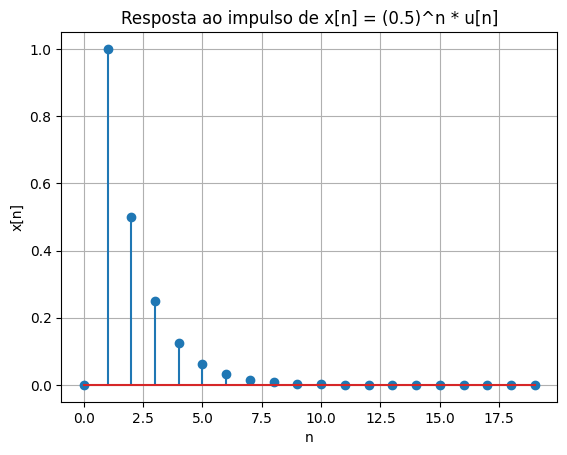

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import dlti, dimpulse

# Sinal: x[n] = (0.5)^n * u[n]
# Transformada-z esperada: X(z) = 1 / (1 - 0.5 z⁻¹), ROC: |z| > 0.5

# Definindo a função de transferência (b, a)
b = [1]
a = [1, -0.5]

# Sistema discreto (resposta ao impulso)
sistema = dlti(b, a)
t, y = dimpulse(sistema, n=20)

# Plotando
plt.stem(t, np.squeeze(y))
plt.title("Resposta ao impulso de x[n] = (0.5)^n * u[n]")
plt.xlabel("n")
plt.ylabel("x[n]")
plt.grid()
plt.show()

## 4.2 Propriedades Importantes da Transformada-z

Algumas propriedades fundamentais:

${}$


1.  **Linearidade:**
    $$
    \mathcal{Z}\{a_1x_1[n] + a_2x_2[n]\} = a_1X_1(z) + a_2X_2(z)
    $$
    
  ROC: $\text{ROC}_{x_1} \cap \text{ROC}_{x_2}$

2.  **Deslocamento no tempo:**
    $$
    \mathcal{Z}\{x[n - n_0]\} = z^{-n_0}X(z)
    $$
    ROC: $\text{ROC}_x$

3.  **Escala exponencial (Frequency shifting):**
    $$
    \mathcal{Z}\{a^n x[n]\} = X\left(\frac{z}{a}\right)
    $$
    ROC: $\text{ROC}_x$ escalada por $|a|$

4.  **Reversão no tempo (Folding):**
    $$
    \mathcal{Z}\{x[-n]\} = X\left(\frac{1}{z}\right)
    $$
    ROC: $\text{ROC}_x$ invertida

5.  **Conjugação Complexa:**
  $$
    \mathcal{Z}\{x^*[n]\} = X^*(z^*)
  $$
  ROC: $\text{ROC}_x$

6.  **Diferenciação no domínio-z (Multiplication-by-a-ramp):**
    $$
    \mathcal{Z}\{nx[n]\} = -z \frac{dX(z)}{dz}
    $$
    ROC: $\text{ROC}_x$

7.  **Multiplicação:**
  $$
    \mathcal{Z}\{x_1[n] x_2[n]\} = \frac{1}{2\pi j} \oint_C X_1(\nu) X_2\left(\frac{z}{\nu}\right) \nu^{-1} d\nu
  $$
  ROC: $\text{ROC}_{x_1} \cap \text{ROC}_{x_2}^{-1}$ (onde $\text{ROC}_{x_2}^{-1}$ é a ROC invertida de $x_2[n]$)
    
    onde C é um contorno fechado que envolve a origem e está na ROC comum.

8.  **Convolução:**
  $$
    \mathcal{Z}\{x_1[n] * x_2[n]\} = X_1(z)X_2(z)
  $$
  ROC: $\text{ROC}_{x_1} \cap \text{ROC}_{x_2}$

### 🧪 Exemplo 1: Multiplicação de duas transformadas-z

Considere:
- $X_1(z) = 2 + 3z^{-1} + 4z^{-2}$
- $X_2(z) = 3 + 4z^{-1} + 5z^{-2} + 6z^{-3}$

Pelo conceito de transformada-z, temos:
- $x_1[n] = \{2,\ 3,\ 4\}$
- $x_2[n] = \{3,\ 4,\ 5,\ 6\}$

O produto $X_3(z) = X_1(z) \cdot X_2(z)$ equivale à **convolução de $x_1[n]$ e $x_2[n]$**.


In [1]:
import numpy as np
from sympy import symbols, simplify

# Sinais no tempo
x1 = [2, 3, 4]
x2 = [3, 4, 5, 6]

# Convolução
x3 = np.convolve(x1, x2)
print("x3[n] =", x3)

# Representação simbólica de X3(z)
z = symbols('z')
X3z = sum([x3[n] * z**(-n) for n in range(len(x3))])
simplify(X3z)


x3[n] = [ 6 17 34 43 38 24]


6 + 17/z + 34/z**2 + 43/z**3 + 38/z**4 + 24/z**5

Alguns pares comuns da Transformada-z:

| Sinal no Tempo ($x[n]$) | Transformada-z ($X(z)$) | Região de Convergência (ROC) |
|---|---|---|
| $\delta[n]$ | $1$ | Todo o plano z |
| $\delta[n-n_0]$ | $z^{-n_0}$ | Todo o plano z, exceto $z=0$ se $n_0 > 0$, ou $\infty$ se $n_0 < 0$ |
| $u[n]$ | $\frac{1}{1 - z^{-1}}$ | $|z| > 1$ |
| $a^n u[n]$ | $\frac{1}{1 - az^{-1}}$ | $|z| > |a|$ |
| $-a^n u[-n-1]$ | $\frac{1}{1 - az^{-1}}$ | $|z| < |a|$ |
| $n u[n]$ | $\frac{z^{-1}}{(1 - z^{-1})^2}$ | $|z| > 1$ |
| $n a^n u[n]$ | $\frac{az^{-1}}{(1 - az^{-1})^2}$ | $|z| > |a|$ |
| $\cos(\omega_0 n) u[n]$ | $\frac{1 - \cos(\omega_0)z^{-1}}{1 - 2\cos(\omega_0)z^{-1} + z^{-2}}$ | $|z| > 1$ |
| $\sin(\omega_0 n) u[n]$ | $\frac{\sin(\omega_0)z^{-1}}{1 - 2\cos(\omega_0)z^{-1} + z^{-2}}$ | $|z| > 1$ |
| $a^n \cos(\omega_0 n) u[n]$ | $\frac{1 - a\cos(\omega_0)z^{-1}}{1 - 2a\cos(\omega_0)z^{-1} + a^2z^{-2}}$ | $|z| > |a|$ |
| $a^n \sin(\omega_0 n) u[n]$ | $\frac{a\sin(\omega_0)z^{-1}}{1 - 2a\cos(\omega_0)z^{-1} + a^2z^{-2}}$ | $|z| > |a|$ |

## 4.3 Inversão da Transformada-z

A inversão da Transformada-z é o processo de encontrar o sinal no domínio do tempo discreto, $x[n]$, a partir de sua Transformada-z, $X(z)$, e sua Região de Convergência (ROC). Em outras palavras, dado $X(z)$ e sua ROC, queremos encontrar $x[n]$ tal que $\mathcal{Z}\{x[n]\} = X(z)$.

Existem vários métodos para realizar a inversão, mas um dos mais práticos e amplamente utilizados, especialmente quando $X(z)$ é uma função racional (uma razão de polinômios em $z^{-1}$ ou $z$), é o **método de expansão em frações parciais**.

### Método de Expansão em Frações Parciais

Este método se baseia na decomposição de $X(z)$ em uma soma de termos mais simples, cujas transformadas inversas são conhecidas a partir da tabela de pares comuns da Transformada-z. A forma geral de uma função racional $X(z)$ é:

$$
X(z) = \frac{N(z)}{D(z)} = \frac{b_0 + b_1z^{-1} + \dots + b_Mz^{-M}}{a_0 + a_1z^{-1} + \dots + a_Nz^{-N}}
$$

ou, multiplicando o numerador e o denominador por $z^N$:

$$
X(z) = \frac{b_0z^N + b_1z^{N-1} + \dots + b_Mz^{N-M}}{a_0z^N + a_1z^{N-1} + \dots + a_Nz^0}
$$

Para aplicar a expansão em frações parciais, o grau do numerador deve ser menor que o grau do denominador. Se não for, uma divisão polinomial deve ser realizada primeiro para obter um termo polinomial e um termo racional próprio.

A expansão em frações parciais de $X(z)/z$ (ou $X(z)$ dependendo da forma utilizada e da tabela de transformadas inversas) resulta em termos da forma $\frac{A}{1 - p_i z^{-1}}$ ou termos correspondentes para polos repetidos ou complexos conjugados, onde $p_i$ são os polos de $X(z)$.

**A Importância da ROC:**

A Região de Convergência (ROC) é crucial para determinar o sinal no domínio do tempo. Diferentes ROCs para a mesma expressão algébrica $X(z)$ correspondem a diferentes sinais $x[n]$. Por exemplo, uma ROC $|z| > |a|$ para $X(z) = \frac{1}{1 - az^{-1}}$ corresponde a um sinal causal $a^n u[n]$, enquanto uma ROC $|z| < |a|$ corresponde a um sinal anti-causal $-a^n u[-n-1]$. A expansão em frações parciais nos dá a forma algébrica, mas a ROC nos diz qual sinal no tempo discreto é o correto.

Este método é mais adequado quando $X(z)$ pode ser expressa como uma função racional e seus polos podem ser facilmente determinados.

Vamos inverter a seguinte Transformada-z:

$$
X(z) = \frac{1}{1 - 1.5z^{-1} + 0.5z^{-2}}
$$

Assumimos que a Região de Convergência (ROC) é $|z| > 1$. Como a ROC é externa ao polo de maior magnitude, esperamos um sinal causal no domínio do tempo.

**Passo 1: Encontrar os polos do denominador.**

O denominador é $D(z) = 1 - 1.5z^{-1} + 0.5z^{-2}$. Para encontrar os polos, podemos igualar o denominador a zero e resolver para $z^{-1}$ (ou $z$). Multiplicando por $z^2$, temos $z^2 - 1.5z + 0.5 = 0$. As raízes desta equação quadrática (em $z$) são os polos.

Usando a fórmula quadrática:
$$
z = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a} = \frac{1.5 \pm \sqrt{(-1.5)^2 - 4(1)(0.5)}}{2(1)} = \frac{1.5 \pm \sqrt{2.25 - 2}}{2} = \frac{1.5 \pm \sqrt{0.25}}{2} = \frac{1.5 \pm 0.5}{2}
$$

Os polos são:
$p_1 = \frac{1.5 + 0.5}{2} = \frac{2}{2} = 1$
$p_2 = \frac{1.5 - 0.5}{2} = \frac{1}{2} = 0.5$

Portanto, o denominador pode ser fatorado como $(1 - z^{-1})(1 - 0.5z^{-1})$.

$$
X(z) = \frac{1}{(1 - z^{-1})(1 - 0.5z^{-1})}
$$

**Passo 2: Decompor $X(z)$ em frações parciais.**

Queremos expressar $X(z)$ na forma:
$$
X(z) = \frac{A}{1 - z^{-1}} + \frac{B}{1 - 0.5z^{-1}}
$$

Para encontrar A e B, podemos usar o método de Heaviside (cobrir e avaliar).

Para A, multiplicamos $X(z)$ por $(1 - z^{-1})$ e avaliamos em $z^{-1} = 1$ (ou $z = 1$):
$$
A = X(z) (1 - z^{-1}) \bigg|_{z^{-1}=1} = \frac{1}{(1 - z^{-1})(1 - 0.5z^{-1})} (1 - z^{-1}) \bigg|_{z^{-1}=1} = \frac{1}{1 - 0.5z^{-1}} \bigg|_{z^{-1}=1} = \frac{1}{1 - 0.5(1)} = \frac{1}{0.5} = 2
$$

Para B, multiplicamos $X(z)$ por $(1 - 0.5z^{-1})$ e avaliamos em $z^{-1} = 2$ (ou $z = 0.5$):
$$
B = X(z) (1 - 0.5z^{-1}) \bigg|_{z^{-1}=2} = \frac{1}{(1 - z^{-1})(1 - 0.5z^{-1})} (1 - 0.5z^{-1}) \bigg|_{z^{-1}=2} = \frac{1}{1 - z^{-1}} \bigg|_{z^{-1}=2} = \frac{1}{1 - 2} = \frac{1}{-1} = -1
$$

Assim, a expansão em frações parciais é:
$$
X(z) = \frac{2}{1 - z^{-1}} - \frac{1}{1 - 0.5z^{-1}}
$$

**Passo 3: Identificar o sinal no tempo usando a tabela e a ROC.**

Consultando a tabela de pares da Transformada-z, sabemos que $\frac{1}{1 - az^{-1}}$ com ROC $|z| > |a|$ corresponde a $a^n u[n]$.

Para o primeiro termo, $\frac{2}{1 - z^{-1}}$, temos $a=1$. A ROC é $|z| > 1$. Como a ROC assumida ($|z| > 1$) satisfaz $|z| > |1|$, a transformada inversa é $2 \cdot 1^n u[n] = 2 u[n]$.

Para o segundo termo, $\frac{-1}{1 - 0.5z^{-1}}$, temos $a=0.5$. A ROC é $|z| > 0.5$. Como a ROC assumida ($|z| > 1$) satisfaz $|z| > |0.5|$, a transformada inversa é $-1 \cdot (0.5)^n u[n] = -(0.5)^n u[n]$.

**Passo 4: Combinar os termos para obter $x[n]$.**

Pela propriedade de linearidade da Transformada-z, a transformada inversa de $X(z)$ é a soma das transformadas inversas de cada termo da fração parcial:
$$
x[n] = 2 u[n] - (0.5)^n u[n]
$$

**Sinal no tempo final:**

$$
x[n] = (2 - (0.5)^n) u[n]
$$

Este é o sinal causal no tempo discreto correspondente à $X(z)$ dada com a ROC $|z| > 1$.

###Implementação em python

In [3]:
from scipy.signal import residuez
import numpy as np
from sympy import symbols, simplify

# Define os coeficientes do numerador (b) e denominador (a) de X(z) em potências decrescentes de z.
# Para X(z) = 1 / (1 - 1.5z⁻¹ + 0.5z⁻²)
# O numerador é 1, então b = [1]
# O denominador é 1 - 1.5z⁻¹ + 0.5z⁻², os coeficientes são 1, -1.5, 0.5
b = [1]
a = [1, -1.5, 0.5]

# A função retorna r, p, k
# r: resíduos (coeficientes A e B no nosso exemplo manual)
# p: polos
# k: termo direto (geralmente 0 para funções racionais próprias)
r, p, k = residuez(b, a)

print("Resíduos (r):", r)
print("Polos (p):", p)
print("Termo direto (k):", k)

# Podemos reconstruir a expansão em frações parciais a partir dos resultados:
z_inv = symbols('z_inv')
Xz_reconstructed = sum([r[i] / (1 - p[i] * z_inv) for i in range(len(r))])
# Adiciona o termo direto 'k' apenas se ele não for vazio e for numérico
if isinstance(k, (list, np.ndarray)) and len(k) > 0 and isinstance(k[0], (int, float)):
    Xz_reconstructed += k[0]

print("\nExpansão em Frações Parciais (simbólica):")
display(simplify(Xz_reconstructed))

z = symbols('z')
Xz_reconstructed_z = sum([r[i] / (1 - p[i] * z**(-1)) for i in range(len(r))])
# Adiciona o termo direto 'k' apenas se ele não for vazio e for numérico
if isinstance(k, (list, np.ndarray)) and len(k) > 0 and isinstance(k[0], (int, float)):
    Xz_reconstructed_z += k[0]


print("\nExpansão em Frações Parciais (em z⁻¹):")
display(simplify(Xz_reconstructed_z))

Resíduos (r): [-1.  2.]
Polos (p): [0.5 1. ]
Termo direto (k): []

Expansão em Frações Parciais (simbólica):


1.0/((0.5*z_inv - 1)*(1.0*z_inv - 1))


Expansão em Frações Parciais (em z⁻¹):


1.0*z**2/((z - 1.0)*(z - 0.5))

## 4.4 Sistemas de Representação na Transformada-z

- Função de transferência $( H(z) = \frac{Y(z)}{X(z)} )$
- Resposta em frequência $( H(e^{j\omega}) )$
- Polos e Zeros: posição no plano-z determina estabilidade e resposta

## 4.4 Representação de Sistemas no Domínio-z

Assim como a resposta em frequência $H(e^{j\omega})$, podemos definir a função no domínio-z chamada **função do sistema**, denotada por $H(z)$.

---

####  Definição da Função do Sistema:

A função do sistema $H(z)$ é a transformada-z da resposta ao impulso $h(n)$:

$$
H(z) = \mathcal{Z}\{h(n)\} = \sum_{n=-\infty}^{\infty} h(n)z^{-n}, \quad R_h^- < |z| < R_h^+
$$

---

####  Relação Entrada-Saída no Domínio-z:

Utilizando a propriedade da convolução da transformada-z:

$$
Y(z) = H(z) \cdot X(z)
$$

O sistema pode ser representado por:

$$
X(z) \longrightarrow H(z) \longrightarrow Y(z)
$$

O **ROC de $Y(z)$** será a interseção dos ROCs de $X(z)$ e $H(z)$.

---

###  4.4.1 Função do Sistema a partir da Equação de Diferenças

Sistemas lineares invariantes no tempo (LTI) podem ser descritos por:

$$
y(n) + \sum_{k=1}^{N} a_k y(n-k) = \sum_{k=0}^{M} b_k x(n-k)
$$

Aplicando a transformada-z:

$$
Y(z)\left(1 + \sum_{k=1}^{N} a_k z^{-k}\right) = X(z)\left(\sum_{k=0}^{M} b_k z^{-k}\right)
$$

Logo, a **função do sistema** $H(z)$ é:

$$
H(z) = \frac{Y(z)}{X(z)} = \frac{B(z)}{A(z)} = \frac{\sum_{k=0}^{M} b_k z^{-k}}{1 + \sum_{k=1}^{N} a_k z^{-k}}
$$

---

####  Forma Fatorada:

$$
H(z) = b_0 z^{N-M} \cdot \frac{\prod_{i=1}^{N}(z - z_i)}{\prod_{k=1}^{N}(z - p_k)}
$$

- $z_i$: zeros do sistema  
- $p_k$: polos do sistema

O sistema pode ser analisado graficamente por um **diagrama de polos e zeros**.

---


###  4.4.2 Representação da Função de Transferência

Quando a **Região de Convergência (ROC)** de $H(z)$ **inclui o círculo unitário** ($z = e^{j\omega}$), podemos avaliar $H(z)$ sobre esse círculo para obter a **função de resposta em frequência**:

---

####  Função de Transferência:

A função de transferência no domínio da frequência é dada por:

$$
H(e^{j\omega}) = b_0 e^{j(N - M)\omega} \cdot \frac{\prod_{k=1}^{M}(e^{j\omega} - z_k)}{\prod_{k=1}^{N}(e^{j\omega} - p_k)}
\tag{4.22}
$$

- $z_k$: zeros do sistema  
- $p_k$: polos do sistema  
- $b_0$: ganho de escala

---

#### 🔍 Interpretação Geométrica:

- O termo $(e^{j\omega} - z_k)$ representa um **vetor** do zero $z_k$ até um ponto na circunferência unitária.
- O termo $(e^{j\omega} - p_k)$ representa um **vetor** do polo $p_k$ até um ponto na circunferência unitária.

---

####  Módulo da Resposta em Frequência:

A magnitude da função de transferência pode ser interpretada como:

$$
|H(e^{j\omega})| = |b_0| \cdot \frac{\prod_{k=1}^{M} |e^{j\omega} - z_k|}{\prod_{k=1}^{N} |e^{j\omega} - p_k|}
\tag{4.23}
$$

- Produto das distâncias dos zeros ao círculo unitário
- Dividido pelas distâncias dos polos ao círculo unitário
- Escalado por $|b_0|$

---

####  Fase da Resposta em Frequência:

$$
\angle H(e^{j\omega}) =
\underbrace{[0\ \text{ou}\ \pi]}_{\text{Constante}} +
\underbrace{(N - M)\omega}_{\text{Linear}} +
\underbrace{\sum_{k=1}^{M} \angle(e^{j\omega} - z_k) - \sum_{k=1}^{N} \angle(e^{j\omega} - p_k)}_{\text{Não-linear}}
\tag{4.24}
$$

- A fase total é composta por três partes:
  - Termo constante
  - Termo de fase linear (frequência multiplicada por diferença de ordem)
  - Termo de fase não-linear (diferença entre ângulos dos vetores dos zeros e polos)

---

>  Essa representação geométrica é essencial para entender a **forma** da resposta de magnitude e fase em filtros digitais (FIR/IIR), além de facilitar o projeto de filtros via **posicionamento de polos e zeros** no plano-z.


### 🧪 Exemplo Prático - Sistema Causal: `y(n) = 0.9y(n−1) + x(n)`

---

#### a) Determinar $H(z)$ e plotar o diagrama de polos e zeros

A equação de diferença é:

$$
y(n) = 0.9 \cdot y(n-1) + x(n)
$$

Aplicando transformada Z e reorganizando:

$$
H(z) = \frac{Y(z)}{X(z)} = \frac{1}{1 - 0.9z^{-1}}
$$

Ou seja:
- Numerador: $b = [1, 0]$
- Denominador: $a = [1, -0.9]$

---

#### b) Plotar |H(e^{jω})| e ∠H(e^{jω})

Utilizaremos `scipy.signal.freqz()` para obter:
- Magnitude da resposta em frequência
- Fase da resposta em frequência

---

#### c) Determinar a resposta ao impulso $h(n)$

A transformada inversa de:

$$
H(z) = \frac{1}{1 - 0.9z^{-1}} \Rightarrow h(n) = (0.9)^n u(n)
$$

Essa resposta é uma exponencial causal com decaimento.


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


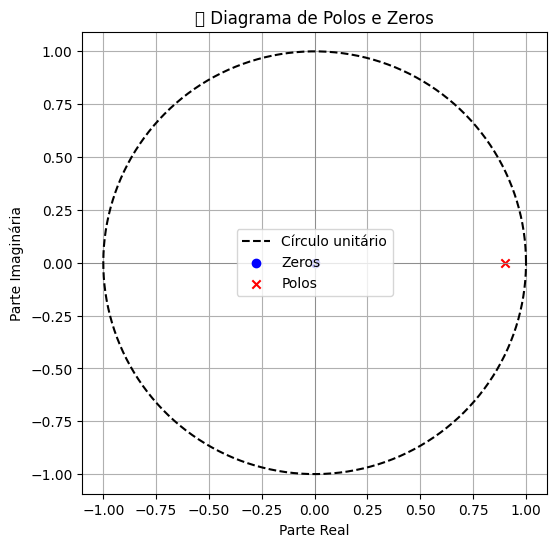

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz, tf2zpk

# Coeficientes do sistema
b = [1, 0]     # Numerador (X(z))
a = [1, -0.9]  # Denominador (Y(z))

# Cálculo dos polos e zeros
z, p, k = tf2zpk(b, a)

# Plot polos e zeros
plt.figure(figsize=(6, 6))
plt.axhline(0, color='gray', lw=0.5)
plt.axvline(0, color='gray', lw=0.5)
theta = np.linspace(0, 2*np.pi, 512)
plt.plot(np.cos(theta), np.sin(theta), 'k--', label='Círculo unitário')

plt.scatter(np.real(z), np.imag(z), marker='o', color='blue', label='Zeros')
plt.scatter(np.real(p), np.imag(p), marker='x', color='red', label='Polos')

plt.title('📍 Diagrama de Polos e Zeros')
plt.xlabel('Parte Real')
plt.ylabel('Parte Imaginária')
plt.grid(True)
plt.axis('equal')
plt.legend()
plt.show()


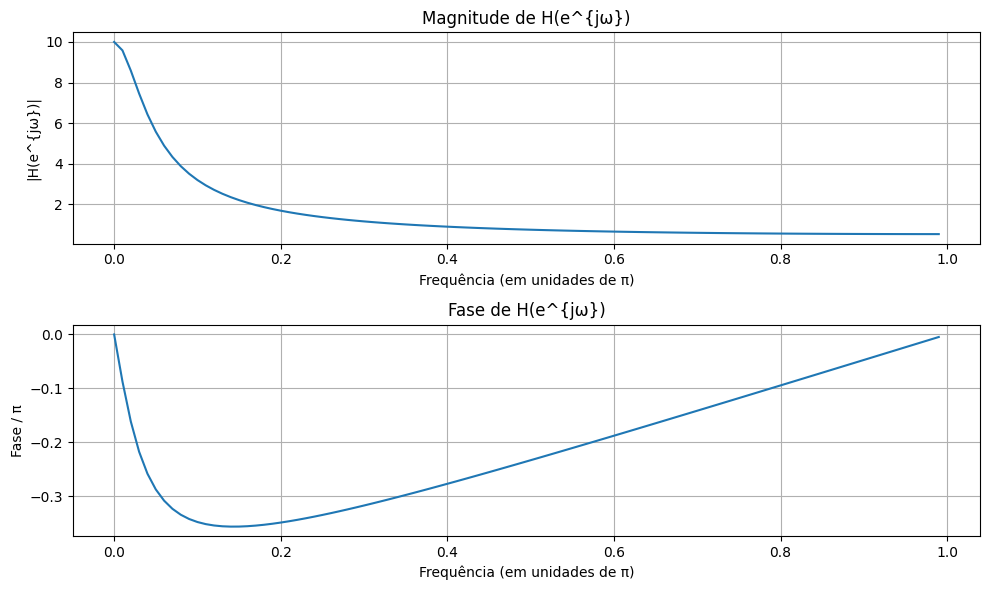

In [5]:
# Frequência e resposta em frequência
w, H = freqz(b, a, worN=100)

# Magnitude e Fase
magH = np.abs(H)
phaH = np.angle(H)

plt.figure(figsize=(10, 6))

# Plot da magnitude
plt.subplot(2, 1, 1)
plt.plot(w/np.pi, magH)
plt.grid(True)
plt.title('Magnitude de H(e^{jω})')
plt.xlabel('Frequência (em unidades de π)')
plt.ylabel('|H(e^{jω})|')

# Plot da fase
plt.subplot(2, 1, 2)
plt.plot(w/np.pi, phaH/np.pi)
plt.grid(True)
plt.title('Fase de H(e^{jω})')
plt.xlabel('Frequência (em unidades de π)')
plt.ylabel('Fase / π')

plt.tight_layout()
plt.show()


##  Capítulo 4.5 – Soluções de Equações de Diferenças

## Objetivo
Resolver equações de diferenças lineares invariantes no tempo (LTI) usando a **Transformada-z**, obtendo a saída \( y(n) \) para uma entrada \( x(n) \), dadas as **condições iniciais**.

---

## Forma Geral da Equação de Diferença

$$
y(n) + a_1y(n-1) + \cdots + a_Ny(n-N) = b_0x(n) + b_1x(n-1) + \cdots + b_Mx(n-M)
$$

---

## Etapas para Resolver com a Transformada-z

1. **Aplicar a Transformada-z** nos dois lados da equação.
2. Utilizar as propriedades da Tz:
   $$
   \mathcal{Z}\{x(n-k)\} = z^{-k}X(z)
   $$
3. **Resolver para \( Y(z) \)**:
   $$
   Y(z) = H(z)X(z) + Y_{\text{CI}}(z)
   $$
   Onde:
   - $H(z) = \frac{B(z)}{A(z)}$ é a **função de sistema**
   - $Y_{\text{CI}}(z)$ é a contribuição das **condições iniciais**

4. **Aplicar a Transformada-z inversa** para obter $ y(n) $

---

## 🧠 Tipos de Respostas

A solução completa é composta por duas partes:

### ✔️ Resposta Particular (ou Forçada)
Resposta do sistema devido à entrada \( x(n) \), assumindo condições iniciais nulas.

### ✔️ Resposta Natural (ou Transitória)
Resposta do sistema apenas devido às **condições iniciais** (entrada nula).

### 🧩 Resposta Total:
$$
y(n) = y_{\text{natural}}(n) + y_{\text{particular}}(n)
$$

---

##  Observações Importantes

- A transformada-z transforma equações de diferenças em **equações algébricas racionais**.
- A solução pode ser obtida de forma simbólica (usando transformada inversa) ou numérica (simulação direta).

---

##  Vantagens do uso da Transformada-z

- Facilita o tratamento de **condições iniciais**.
- Permite obter diretamente a função de transferência \( H(z) \).
- Permite simular e analisar o sistema com ferramentas computacionais como MATLAB ou Python.


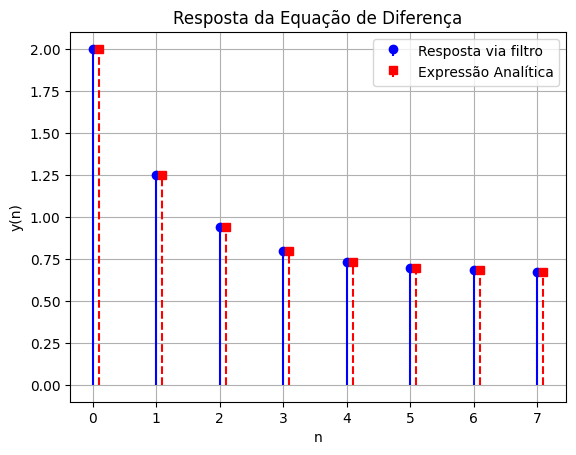

Resposta via filtro (lfilter): [2.         1.25       0.9375     0.796875   0.73046875 0.69824219
 0.68237305 0.67449951]
Expressão analítica: [2.         1.25       0.9375     0.796875   0.73046875 0.69824219
 0.68237305 0.67449951]


In [6]:
# 📚 Exemplo: Resolvendo Equação de Diferença com Condições Iniciais
# y(n) - (3/2)y(n-1) + (1/2)y(n-2) = x(n), com x(n) = (1/4)^n u(n)
# Condições iniciais: y(-1) = 4, y(-2) = 10

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter

#Coeficientes da equação de diferença
b = [1]                     # Numerador de H(z)
a = [1, -3/2, 1/2]          # Denominador de H(z)

# Tempo de simulação
n = np.arange(0, 8)

# Entrada: x(n) = (1/4)^n u(n)
x = (1/4) ** n

# Condições iniciais: y(-1)=4, y(-2)=10
# Para scipy.signal.lfilter, as condições iniciais devem ser dadas como estado interno
# Inicializamos os estados de forma compatível com a equação da diferença
# Usamos o sistema equivalente em forma de espaço de estados
from scipy.signal import lfiltic

# Ordem do sistema = 2 → precisamos de 2 condições iniciais
# Como lfiltic usa x(-1), x(-2) = 0 por padrão
xic = lfiltic(b, a, y=[4, 10])  # Note que os valores devem estar em ordem reversa

# Solução via filtro
y1 = lfilter(b, a, x, zi=xic)[0]

# Verificação analítica (resposta completa do sistema)
# y(n) = (1/3)*(1/4)^n + (1/2)^n + (2/3)
y2 = (1/3)*(1/4)**n + (1/2)**n + (2/3)

# Plotando ambas as soluções para comparação
plt.stem(n, y1, linefmt='b-', markerfmt='bo', basefmt=' ', label='Resposta via filtro')
plt.stem(n + 0.1, y2, linefmt='r--', markerfmt='rs', basefmt=' ', label='Expressão Analítica')
plt.xlabel('n')
plt.ylabel('y(n)')
plt.title('Resposta da Equação de Diferença')
plt.grid(True)
plt.legend()
plt.show()

#  Imprimindo os valores
print("Resposta via filtro (lfilter):", np.round(y1, 8))
print("Expressão analítica:", np.round(y2, 8))
